# Cholesky factorization

```{admonition} Definition: The Transpose of a Matrix
Transpose of a matrix is formed by turning rows into columns and vice versa. For a matrix $A$, we denote the transpose of $A$ by $A^T$.
```

```{admonition} Definition: Symmetric and Skew Symmetric Matrices
An $n\times n$ matrix $A$ is
* Symmetric if $A = A^T$.
* Skew-symmetric if $A = -A^T$.
```

```{admonition} Definition: Positive Definite
An $n\times n$ complex matrix $A$ is **positive definite** if
\begin{align*}
x^TAx > 0,
\end{align*}
for all nonzero vectors x in $\mathbb{R}^n$. 
```

```{admonition} Theorem
Assume that $A$ is a real and symmetric positive definite matrix. Then, a unique real lower triangular matrix B with positive diagonal entries exists such that
\begin{align*}
A = BB^T,
\end{align*}
where $B^T$ denotes the conjugate transpose of $B$.
```


Furthermore, We have,
\begin{align*}
\begin{bmatrix}a_{11} & a_{12} & \dots & a_{1n} \\ a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots &   & \vdots \\ a_{n1} & a_{n2} & \dots & a_{nn} \end{bmatrix}=
\begin{bmatrix}b_{11} & 0 & \dots & 0 \\ b_{21} & b_{22} & \dots & 0 \\
\vdots & \vdots &   & \vdots \\ b_{n1} & b_{n2} & \dots & b_{nn} \end{bmatrix}
\begin{bmatrix}b_{11} & b_{12} & \dots & b_{1n} \\ 0 & b_{22} & \dots & b_{2n} \\
\vdots & \vdots &   & \vdots \\ 0 & 0 & \dots & b_{nn} \end{bmatrix}.
\end{align*}
Observe that $L$ is lower triangular and $U$ upper triangular. Thus,
\begin{align*}
a_{ij} = \sum_{k = 1}^{n} b_{ik} b_{jk} = \sum_{k = 1}^{\min(i,j)} b_{ik} b_{jk}, \quad 1\leq i,j\leq n.
\end{align*}

Solving this system:
* **Column 1.** Set $j = 1$ and for $1\leq i\leq n$, we have,
\begin{align*}
\begin{array}{lcl}
a_{11} = (b_{11})^2 & \Rightarrow & b_{11} = \sqrt{a_{11}},\\
a_{21} = b_{11}\,b_{21}& \Rightarrow & b_{21} = a_{21}/b_{11},\\
\vdots &  & \vdots\\
a_{n1} = b_{11}\,b_{n1}& \Rightarrow & b_{n1} = a_{n1}/b_{11},
\end{array}
\end{align*}
* **Column j.** For a fixed $j$ and for $1\leq i\leq n$, we have,
\begin{align*}
\begin{array}{lcl}
a_{jj} = (b_{j1})^2 + (b_{j2})^2 + \ldots + (b_{jj})^2 & \Rightarrow & b_{jj} = \sqrt{a_{jj} - \sum_{k = 1}^{j-1} (b_{jk})^2},\\
a_{j+1,j} = b_{j1}\,b_{j+1,1} + \ldots + b_{jj}\,b_{j+1,j} & \Rightarrow & b_{j+1,j} = \frac{1}{b_{jj}}
\left( a_{j+1,j} - \sum_{k = 1}^{j-1} b_{jk}\,b_{j+1,k} \right),\\
\vdots &  & \vdots\\
a_{nj} = b_{j,1}\,b_{n1} + \ldots + b_{jj}\,b_{nj} & \Rightarrow & b_{nj} = \frac{1}{b_{jj}}
\left( a_{nj} - \sum_{k = 1}^{j-1} b_{jk}\,b_{nk} \right).
\end{array}
\end{align*}

Thus, 
\begin{align*}
b_{j,j} &={\sqrt {a_{j,j}-\sum _{k=1}^{j-1}b_{j,k}^{2}}},\\
b_{i,j}&={\frac {1}{a_{j,j}}}\left(a_{i,j}-\sum _{k=1}^{j-1}b_{i,k}b_{j,k}\right)\quad {\text{for }}i>j.
\end{align*}

See {cite:ps}`khoury2016numerical, allaire2008numerical` for the full derivation of this algorithm.

::::{tab-set}

:::{tab-item} Python Code
```python
import numpy as np

def myCholesky(A):
    '''
    Assuming that the matrix A is symmetric and positive definite,
    this function calculates a lower triangular matrix G with positive
    diagonal entries, such that A = BB^T

    Parameters
    ----------
    A : numpy array
        DESCRIPTION. Matrix A

    Returns
    -------
    B : numpy array
        DESCRIPTION. Matrix B from A = BB*

    '''
    
    n = A.shape[1]
    B = np.zeros([n, n], dtype=float);
    B[0,0] = np.sqrt(A[0,0]);
    B[1:n, 0]= A[1:n,0] / B[0,0];
    for j in range(1, n):
        B[j,j] = np.sqrt(A[j,j]- np.dot(B[j, 0:j], B[j, 0:j]))
        for i in range(j+1, n):
            B[i,j]=(A[i,j] - np.dot(B[i, 0:j],B[j, 0:j]))/B[j,j]
    return B   
```
:::

:::{tab-item} MATLAB Code
```MATLAB
function [B] = myCholesky(A)
%{
Assuming that the matrix A is symmetric and positive definite,
this function calculates a lower triangular matrix G with positive
diagonal entries, such that A = BB^T

Parameters
----------
A : numpy array
    DESCRIPTION. Matrix A

Returns
-------
B : numpy array
    DESCRIPTION. Matrix B from A = BB*
%}

B = zeros(n,n);
B(1,1)=sqrt(A(1,1));
B(2:n,1)=A(2:n,1)/B(1,1);
for j=2:n
    B(j,j)=sqrt(A(j,j)-dot(B(j,1:j-1),B(j,1:j-1)));
    for i=j+1:n
        B(i,j)=(A(i,j)-dot(B(i,1:j-1),B(j,1:j-1)))/B(j,j);
    end
end
```
:::

::::

In [1]:
import sys
sys.path.insert(0,'..')
import hd_tools as hd

Loading BokehJS ...

<font color='Blue'><b>Example</b></font>: Apply Cholesky decomposition on the following matrix and identify $B$.
\begin{align*}A = \left[\begin{array}{cccc} 7 & 3 & -1 & 2\\ 3 & 8 & 1 & -4\\ -1 & 1 & 4 & -1\\ 2 & -4 & -1 & 6 \end{array}\right].\end{align*}

<font color='Green'><b>Solution</b></font>: We have,

In [2]:
import numpy as np
from hd_Matrix_Decomposition import myCholesky
from IPython.display import display, Latex
from sympy import init_session, init_printing, Matrix

A = np.array([ [7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6] ])
B = myCholesky(A)

display(Latex(r'A ='), Matrix(A))
display(Latex(r'B ='), Matrix(np.round(B, 2)))
display(Latex(r'B  B^T ='), Matrix(np.round(np.matmul(B,B.T), 2)))

<IPython.core.display.Latex object>

Matrix([
[ 7,  3, -1,  2],
[ 3,  8,  1, -4],
[-1,  1,  4, -1],
[ 2, -4, -1,  6]])

<IPython.core.display.Latex object>

Matrix([
[ 2.65,     0,    0,    0],
[ 1.13,  2.59,    0,    0],
[-0.38,  0.55, 1.88,    0],
[ 0.76, -1.87, 0.17, 1.37]])

<IPython.core.display.Latex object>

Matrix([
[ 7.0,  3.0, -1.0,  2.0],
[ 3.0,  8.0,  1.0, -4.0],
[-1.0,  1.0,  4.0, -1.0],
[ 2.0, -4.0, -1.0,  6.0]])

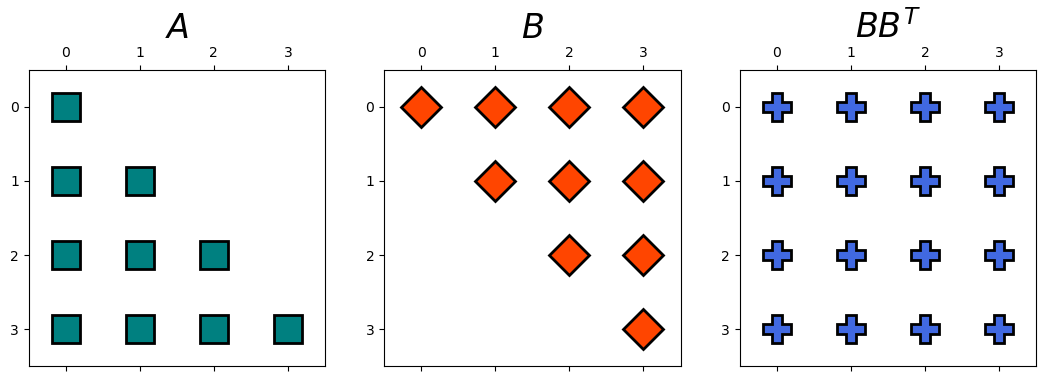

In [3]:
hd.matrix_decomp_fig(mats = [B, B.T, np.round(np.matmul(B,B.T), 2)], labels = ['$A$', '$B$', '$B  B^T$'])

Note that we could get a similar results using function, [```numpy.linalg.cholesky```](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cholesky.html).

In [4]:
import scipy.linalg as linalg
B = np.linalg.cholesky(A)
display(Latex(r'B ='), Matrix(np.round(B, 2)))

<IPython.core.display.Latex object>

Matrix([
[ 2.65,     0,    0,    0],
[ 1.13,  2.59,    0,    0],
[-0.38,  0.55, 1.88,    0],
[ 0.76, -1.87, 0.17, 1.37]])

## Solving Linear systems using Cholesky factorization

We can solve the linear system $Ax=b$ for $x$ using Cholesky decomposition. To demonstrate this, we use the following example,

<font color='Blue'><b>Example</b></font>:
Solve the following linear system using Cholesky decomposition.
\begin{align*}
\begin{cases}
7\,x_{1}+3\,x_{2}-x_{3}+2\,x_{4}=18\\ 3\,x_{1}+8\,x_{2}+x_{3}-4\,x_{4}=6\\ x_{2}-x_{1}+4\,x_{3}-x_{4}=9\\ 2\,x_{1}-4\,x_{2}-x_{3}+6\,x_{4}=15
\end{cases}
\end{align*}

<font color='Green'><b>Solution</b></font>:

Let $A=\left[\begin{array}{cccc} 7 & 3 & -1 & 2\\ 3 & 8 & 1 & -4\\ -1 & 1 & 4 & -1\\ 2 & -4 & -1 & 6 \end{array}\right]$
and $b=\left[\begin{array}{c} 18\\ 6\\ 9\\ 15 \end{array}\right]$.
Then, this linear system can be also expressed as follows,
\begin{align*}
Ax=(BB^T)x=B(B^Tx)=b.
\end{align*}
We have,

In [5]:
A = np.array([ [7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6] ])
b = np.array([[18],[ 6],[ 9],[15]])
B = myCholesky(A)
display(Latex(r'B ='), Matrix(np.round(B, 2)))

<IPython.core.display.Latex object>

Matrix([
[ 2.65,     0,    0,    0],
[ 1.13,  2.59,    0,    0],
[-0.38,  0.55, 1.88,    0],
[ 0.76, -1.87, 0.17, 1.37]])

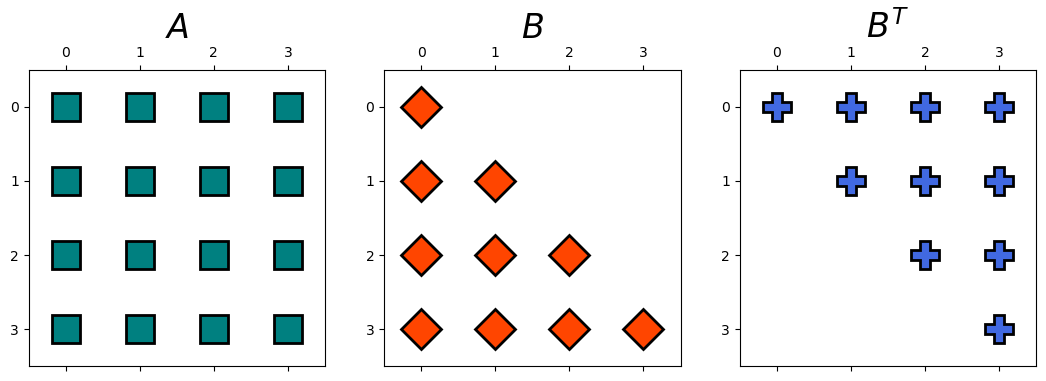

In [6]:
hd.matrix_decomp_fig(mats = [A, B, B.T], labels = ['$A$', '$B$', '$B^T$'])

Now we can solve the following linear systems instead
\begin{align*}\begin{cases}By=b,\\
B^Tx=y.\end{cases}\end{align*}

In [7]:
# solving y
y = np.linalg.solve(B, b)
display(Latex(r'y ='), Matrix(np.round(y, 2)))

<IPython.core.display.Latex object>

Matrix([
[  6.8],
[-0.66],
[ 6.33],
[ 5.49]])

In [8]:
# solving x
x = np.linalg.solve(B.T, y)
display(Latex(r'x ='), Matrix(np.round(x, 2)))

<IPython.core.display.Latex object>

Matrix([
[1.0],
[2.0],
[3.0],
[4.0]])

Let's now solve the linear system directly and compare the results.

In [10]:
x_new = linalg.solve(A, b)
display(Latex(r'x ='), Matrix(np.round(x_new, 2)))

<IPython.core.display.Latex object>

Matrix([
[1.0],
[2.0],
[3.0],
[4.0]])